<a href="https://colab.research.google.com/github/DoreenDoreen/Customer-Churn-Prediction/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Customer Churn Prediction in Telecommunication Industry


* [Part 0: Setup Environment](#Part-0:-Setup-Environment)
* [Part 1: Data Exploration](#Part-1:-Data-Exploration)
* [Part 2: Feature Preprocessing](#Part-2:-Feature-Preprocessing)
* [Part 3: Model Training and Results Evaluation](#Part-3:-Model-Training-and-Result-Evaluation)
* [Part 4: Feature Importance](#Part-4:-Feature-Importance)

## Part 0: Setup Google Drive Environment 

In [1]:
# install pydrive to load data

!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
myid = "1xRCGbds_iAhBLVL2UHdQAk_vgAG0R3wZ"

file = drive.CreateFile({'id':myid})  
file.GetContentFile('Telecom.csv') 

## Part 1: Data Exploration

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
import sklearn.preprocessing 

In [24]:
churnDF = pd.read_csv('Telecom.csv')
churnDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Part 1.1 Preview Features' Information

In [25]:
churnDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
churnDF.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [27]:
# convert feature type 
churnDF['TotalCharges'] = pd.to_numeric(churnDF['TotalCharges'], errors='coerce', downcast='float')
churnDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [33]:
# Delete Null records
churnDF.dropna(inplace=True)

In [34]:
churnDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [35]:
# convert label to numetical variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 
churnDF['Churn'] = le.fit_transform(churnDF['Churn'])
churnDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1


In [36]:
y = churnDF['Churn'] 
print(y)  

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64


### Part 1.2 Understand Features 

In [38]:
# Checking outliers and extrem cases
churnDF[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300537
std,24.545260,30.085974,2266.771484
min,1.000000,18.250000,18.799999
25%,9.000000,35.587500,401.449997
50%,29.000000,70.350000,1397.475037
75%,55.000000,89.862500,3794.737488
max,72.000000,118.750000,8684.799805


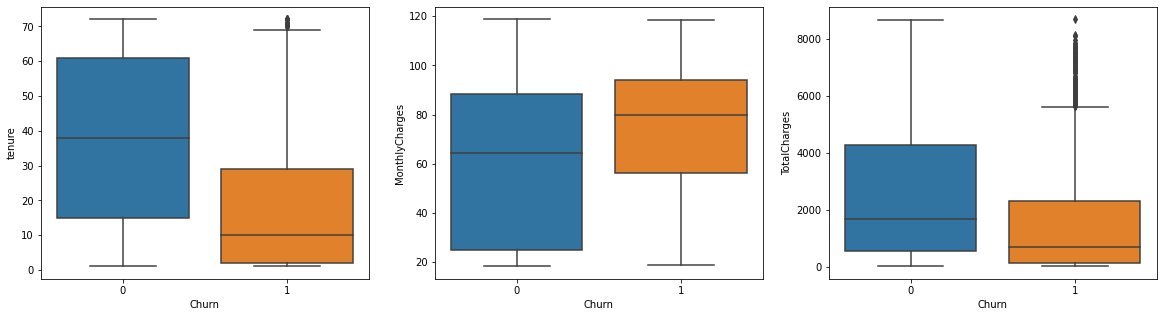

In [42]:
# Visualization of Numetical Features 

fig, axss = plt.subplots(1,3,figsize=[20,5])

sns.boxplot(x='Churn', y='tenure', data=churnDF, ax=axss[0])
sns.boxplot(x='Churn', y='MonthlyCharges', data=churnDF, ax=axss[1])
sns.boxplot(x='Churn', y='TotalCharges', data=churnDF, ax=axss[2])

In [45]:
cor_matrix = churnDF[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
cor_matrix

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


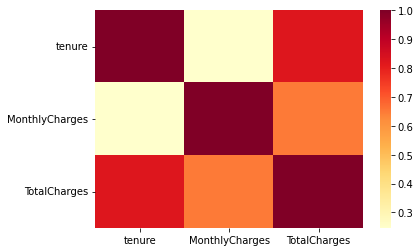

In [47]:
sns.heatmap(data=cor_matrix, cmap='YlOrRd')

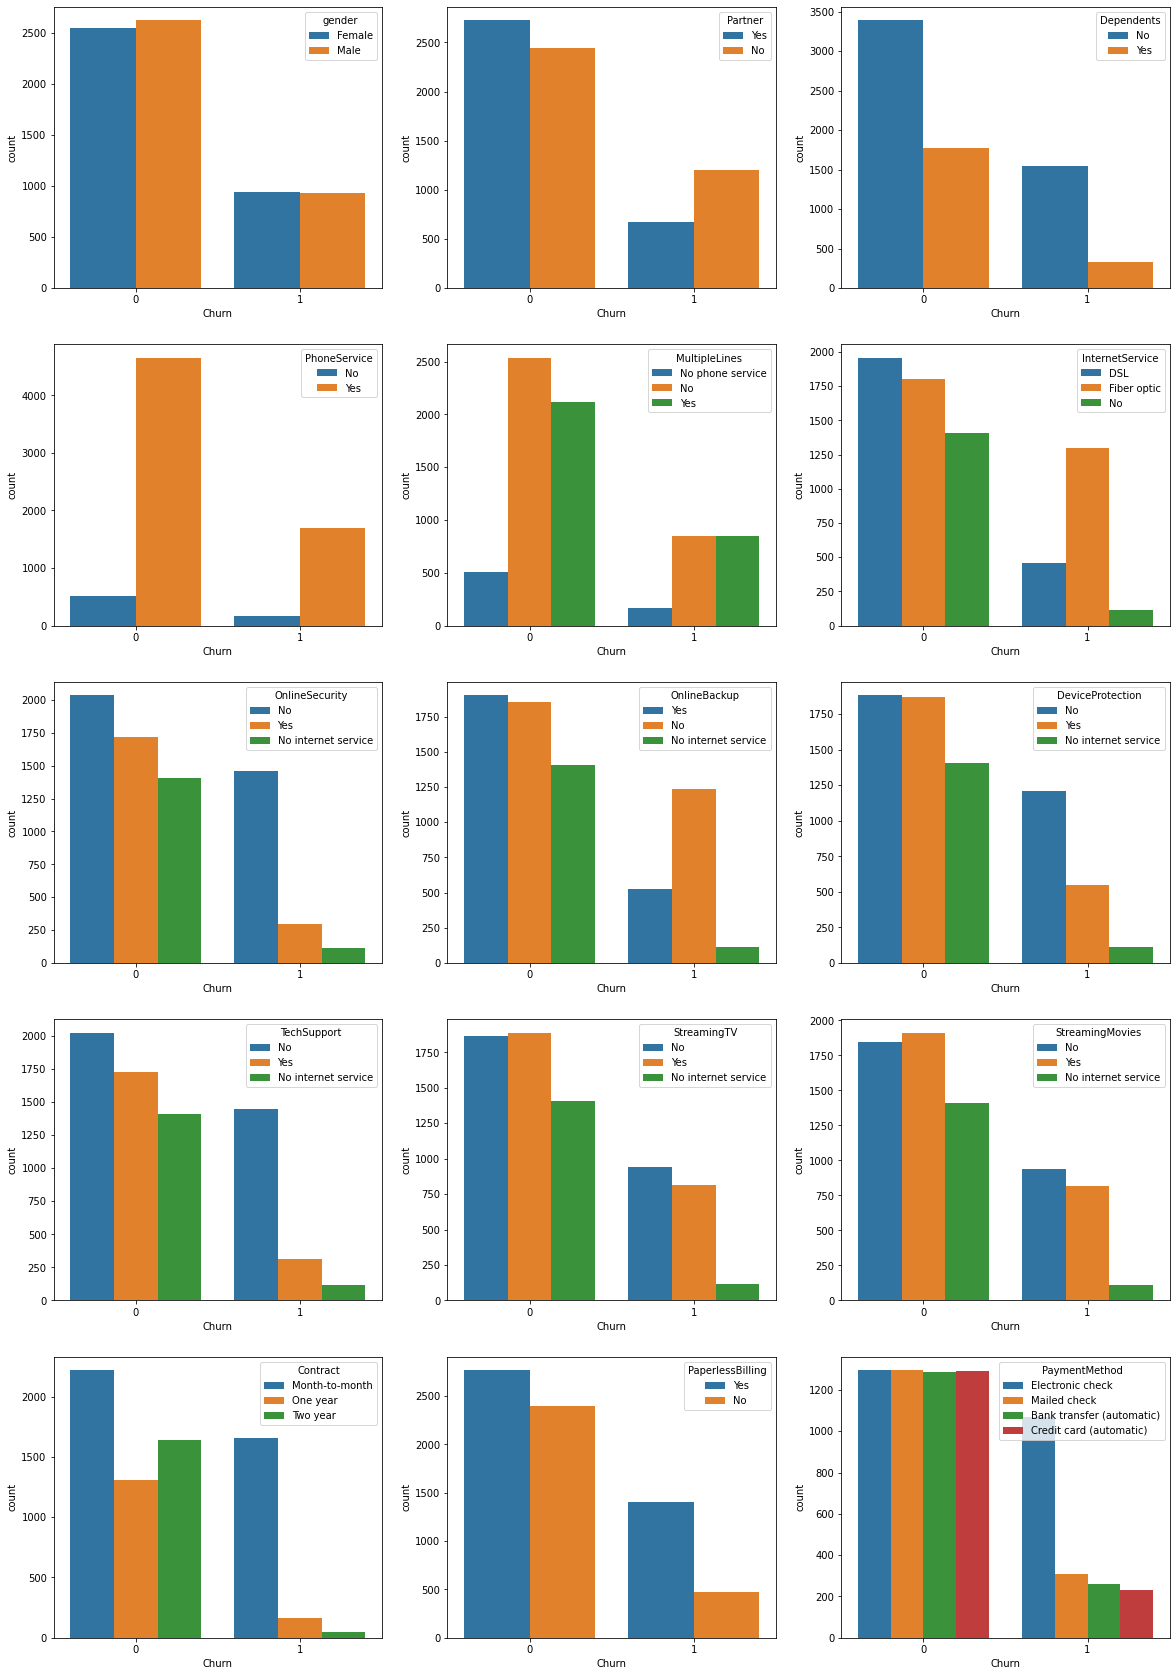

In [52]:
# Visualization of Categorical Features 

fig, axss = plt.subplots(5,3, figsize=[20, 30])

sns.countplot(x='Churn', hue='gender', data=churnDF, ax=axss[0][0]) 
sns.countplot(x='Churn', hue='Partner', data=churnDF, ax=axss[0][1]) 
sns.countplot(x='Churn', hue='Dependents', data=churnDF, ax=axss[0][2]) 

sns.countplot(x='Churn', hue='PhoneService', data=churnDF, ax=axss[1][0]) 
sns.countplot(x='Churn', hue='MultipleLines', data=churnDF, ax=axss[1][1]) 
sns.countplot(x='Churn', hue='InternetService', data=churnDF, ax=axss[1][2]) 

sns.countplot(x='Churn', hue='OnlineSecurity', data=churnDF, ax=axss[2][0]) 
sns.countplot(x='Churn', hue='OnlineBackup', data=churnDF, ax=axss[2][1]) 
sns.countplot(x='Churn', hue='DeviceProtection', data=churnDF, ax=axss[2][2]) 

sns.countplot(x='Churn', hue='TechSupport', data=churnDF, ax=axss[3][0]) 
sns.countplot(x='Churn', hue='StreamingTV', data=churnDF, ax=axss[3][1]) 
sns.countplot(x='Churn', hue='StreamingMovies', data=churnDF, ax=axss[3][2]) 

sns.countplot(x='Churn', hue='Contract', data=churnDF, ax=axss[4][0]) 
sns.countplot(x='Churn', hue='PaperlessBilling', data=churnDF, ax=axss[4][1]) 
sns.countplot(x='Churn', hue='PaymentMethod', data=churnDF, ax=axss[4][2]) 

## Part 2: Feature Engineering

In [117]:
churnDF.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994,1


In [118]:
# delete irrelevant feature

X = churnDF.drop(['customerID', 'Churn'], axis=1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994


In [119]:
# seperate numerical features and categorical features

cat_cols = X.columns[X.dtypes == 'object']
cat_cols 

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [68]:
num_cols = X.columns[(X.dtypes == 'int') | (X.dtypes == 'float64') | (X.dtypes == 'float32')] 
num_cols 

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Part 2.1 Splite Dataset 

In [120]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=1)

print('X_train is features in the training dataset, which contains ' + str(len(X_train)) + ' rows of entry, and ' + str(len(X_train.columns)) + ' columns of features.') 
print('X_test is features in the testing dataset, which contains ' + str(len(X_test)) + ' rows of entry, and ' + str(len(X_test.columns)) + ' columns of features.') 


X_train is features in the training dataset, which contains 5274 rows of entry, and 19 columns of features.
X_test is features in the testing dataset, which contains 1758 rows of entry, and 19 columns of features.


### Part 2.2 Categorical Features

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
def OneHotEncoding(df, encode, category):
  cur_df = encode.transform(df[category]) 
  features = encode.get_feature_names(category) 
  transformed = pd.DataFrame(cur_df.toarray(), columns = features)
  res = pd.concat([df.reset_index(drop=True), transformed], axis=1) 
  return res.drop(category, axis=1) 

In [123]:
# Convert categorical features with >=3 levels using One-Hot Encoding approach 

cate = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']

for i in range(len(cate)):
  category = [cate[i]] 
  # print('category', category)

  initial_ohe = OneHotEncoder()
  initial_ohe.fit(X_train[category]) 

  X_train = OneHotEncoding(X_train, initial_ohe, category)
  X_test = OneHotEncoding(X_test, initial_ohe, category)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [124]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Male,0,No,No,30,Yes,Yes,64.50,1888.449951,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Female,0,Yes,Yes,66,Yes,Yes,58.20,3810.800049,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Male,0,Yes,Yes,69,Yes,No,95.75,6511.250000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,Female,0,No,No,12,No,Yes,33.60,435.450012,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,Female,0,No,No,62,Yes,Yes,92.05,5755.799805,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [125]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Male,0,No,No,1,Yes,Yes,19.30,19.299999,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Male,1,Yes,No,30,Yes,Yes,101.50,2917.649902,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Female,1,No,No,49,Yes,No,103.00,5166.200195,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,Female,1,Yes,No,50,Yes,Yes,95.05,4888.700195,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,Female,0,Yes,No,60,Yes,Yes,110.80,6640.700195,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [126]:
# Convert categorical features with 2 levels using Ordinal Encoding approach 

from sklearn.preprocessing import OrdinalEncoder

numerics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] 

for j in range(len(numerics)):
  nume = [numerics[j]] 

  initial_oe = OrdinalEncoder() 
  initial_oe.fit(X_train[nume]) 

  X_train[nume] = initial_oe.transform(X_train[nume])
  X_test[nume] = initial_oe.transform(X_test[nume]) 

In [127]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,1,1.0,1.0,19.30,19.299999,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.0,30,1.0,1.0,101.50,2917.649902,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,49,1.0,0.0,103.00,5166.200195,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,1.0,0.0,50,1.0,1.0,95.05,4888.700195,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,60,1.0,1.0,110.80,6640.700195,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [128]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,0.0,0.0,0.0,30,1.0,1.0,64.50,1888.449951,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,66,1.0,1.0,58.20,3810.800049,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,1.0,69,1.0,0.0,95.75,6511.250000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,12,0.0,1.0,33.60,435.450012,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,62,1.0,1.0,92.05,5755.799805,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Part 2.3 Numerical Features

In [129]:
from sklearn.preprocessing import StandardScaler 

initial_scaler = StandardScaler()
initial_scaler.fit(X_train[num_cols])  

X_train[num_cols] = initial_scaler.transform(X_train[num_cols])
X_test[num_cols] = initial_scaler.transform(X_test[num_cols])   

In [130]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,-0.439253,0.0,0.0,-0.097798,1.0,1.0,-0.008816,-0.172578,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,-0.439253,1.0,1.0,1.366234,1.0,1.0,-0.217370,0.674161,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,-0.439253,1.0,1.0,1.488236,1.0,0.0,1.025677,1.863630,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,-0.439253,0.0,0.0,-0.829814,0.0,1.0,-1.031723,-0.812583,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,-0.439253,0.0,0.0,1.203563,1.0,1.0,0.903193,1.530876,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [131]:
X_test.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1.0,-0.439253,0.0,0.0,-1.277157,1.0,1.0,-1.505107,-0.995884,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,2.276595,1.0,0.0,-0.097798,1.0,1.0,1.216024,0.280754,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,2.276595,0.0,0.0,0.674885,1.0,0.0,1.265680,1.271175,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,2.276595,1.0,0.0,0.715553,1.0,1.0,1.002505,1.148944,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,-0.439253,1.0,0.0,1.122228,1.0,1.0,1.523889,1.920649,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


## Part 3: Model Training and Evaluation

### Part 3.1 Quick Pre-run (Demo)

In [132]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression  

In [133]:
rf_preview = RandomForestClassifier()
rf_preview.fit(X_train, y_train)
rf_preview.predict(X_test)
rf_preview.score(X_test, y_test) 

0.7792946530147895

In [134]:
knn_preview = KNeighborsClassifier()
knn_preview.fit(X_train, y_train) 
knn_preview.predict(X_test) 
knn_preview.score(X_test, y_test) 

0.7525597269624573

In [135]:
lr_preview = LogisticRegression()
lr_preview.fit(X_train, y_train) 
lr_preview.predict(X_test) 
lr_preview.score(X_test, y_test) 

0.8037542662116041

### Part 3.2 Formal Prediction -> Use Grid Search to Find Optimal Hyperparameters

In [195]:
from sklearn.model_selection import GridSearchCV 

#### Part 3.2.1 Find Optimal Hyperparameters - Logistic Regression 

In [377]:
parameters = {
    'penalty':('l1', 'l2'), 
    'C':( 1.5, 1.6, 1.7, 1.8, 1.9)
}

In [197]:
init_LR = LogisticRegression(solver='liblinear')

In [378]:
Grid_LR = GridSearchCV(init_LR, parameters, cv=5) 

In [379]:
Grid_LR.fit(X_train, y_train) 

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': (1.5, 1.6, 1.7, 1.8, 1.9),
                         'penalty': ('l1', 'l2')})

In [228]:
def print_grid_search_result(GS):
  print ("Best score: " + str(GS.best_score_))   # .best_score_ will return the Mean cross-validated score of the best_estimator 
  print ("Best parameters set:")                       
  best_parameters = GS.best_params_     # .best_params_ will return a dictionary, which contains the best parameter for hold-out datset
  for param_name in sorted(best_parameters.keys()):  
      print(param_name + ':' + str(best_parameters[param_name]))  

In [380]:
print_grid_search_result(Grid_LR)

Best score: 0.804132125866705
Best parameters set:
C:1.7
penalty:l1


In [381]:
# best model
best_LR_model = Grid_LR.best_estimator_    # store the best estimated results from Grid_LR as best_LR_model 

#### Part 3.2.2 Find Optimal Hyperparameters - KNN

In [394]:
parameters = {
    'n_neighbors':[7, 8, 9, 10, 11]
}

In [232]:
init_KNN = KNeighborsClassifier()

In [395]:
Grid_KNN = GridSearchCV(init_KNN, parameters, cv=5)

In [396]:
Grid_KNN.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [7, 8, 9, 10, 11]})

In [397]:
print_grid_search_result(Grid_KNN)

Best score: 0.7825175139617075
Best parameters set:
n_neighbors:8


In [398]:
# best model
best_KNN_model = Grid_KNN.best_estimator_ 

#### Part 3.2.3 Find Optimal Hyperparameters - Random Forest

In [372]:
parameters = {
    'n_estimators' : [ 89, 90, 95, 100, 105, 110],  
    'max_depth': [ 7, 8, 9, 10, 11]   
}

In [281]:
init_RF = RandomForestClassifier()

In [373]:
Grid_RF = GridSearchCV(init_RF, parameters, cv=5)

In [374]:
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [7, 8, 9, 10, 11],
                         'n_estimators': [89, 90, 95, 100, 105, 110]})

In [375]:
print_grid_search_result(Grid_RF)

Best score: 0.8052701062079013
Best parameters set:
max_depth:8
n_estimators:110


In [376]:
# best model
best_RF_model = Grid_RF.best_estimator_ 

### Part 3.3 Model Evaluation - Confusion Matrix (Precision, Recall, Accuracy)

In [320]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve 

In [326]:
# calculate accuracy, precision and recall
def cal_evaluation(classifier, cm):
    tn = cm[0][0]     #  True Nagetive  
    fp = cm[0][1]     #  False Positive  
    fn = cm[1][0]     #  False Negative  
    tp = cm[1][1]     #  True Positive   

    accuracy  = (tp + tn) / (tp + fp + fn + tn + 0.0)   # here + 0.0 is to make sure the calculated score hold better precision, the result is float 
    precision = tp / (tp + fp + 0.0)   
    recall = tp / (tp + fn + 0.0)
  
    print (classifier)
    print ("Accuracy is: " + str(accuracy))
    print ("precision is: " + str(precision))
    print ("recall is: " + str(recall))
    print ()

In [327]:
def draw_confusion_matrices(confusion_matrices):
    class_names = ['Not', 'Churn'] 
    for cm in confusion_matrices:
        classifier, cm = cm[0], cm[1] 
        cal_evaluation(classifier, cm) 

In [399]:
# Confusion matrix, accuracy, precison and recall for random forest and logistic regression
confusion_matrices = [
    ("Random Forest", confusion_matrix(y_test, best_RF_model.predict(X_test))),
    ("Logistic Regression", confusion_matrix(y_test, best_LR_model.predict(X_test))),
    ("K nearest neighbor", confusion_matrix(y_test, best_KNN_model.predict(X_test)))
]   

draw_confusion_matrices(confusion_matrices)  

Random Forest
Accuracy is: 0.8014789533560864
precision is: 0.6676136363636364
recall is: 0.5032119914346895

Logistic Regression
Accuracy is: 0.8026166097838453
precision is: 0.6477832512315271
recall is: 0.563169164882227

K nearest neighbor
Accuracy is: 0.7707622298065984
precision is: 0.5924855491329479
recall is: 0.43897216274089934



### Part 3.4: Model Evaluation - ROC & AUC

In [363]:
from sklearn.metrics import roc_curve
from sklearn import metrics 

#### Part 3.4.1 ROC of RF Model

In [383]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_rf = best_RF_model.predict_proba(X_test)[:, 1]  # return ndarray of shape, which has 1st column represents the prob of not churn, the 2nd column represents the prob of churn                                                        
fpr_rf, tpr_rf, thresholds  = roc_curve(y_test, y_pred_rf) 

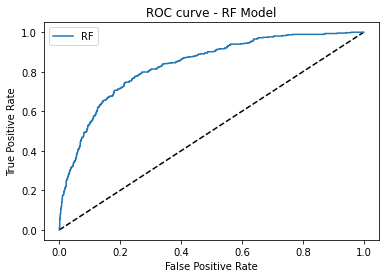

In [384]:
# Draw ROC curve of Random Forest 

plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - RF Model')
plt.legend(loc='best')
plt.show()

In [385]:
# AUC score of Random Forest

metrics.auc(fpr_rf, tpr_rf)   # AUC threshold > 0.8, which means model is acceptable.   

0.8337468920893618

#### Part 3.4.2 ROC of LR Model

In [386]:
# Use predict_proba to get the probability results of Logistic Regression
y_pred_lr = best_LR_model.predict_proba(X_test)[:, 1] 
fpr_lr, tpr_lr, thresh = roc_curve(y_test, y_pred_lr)   

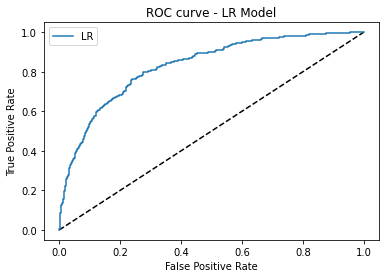

In [387]:
# Draw ROC curve
plt.figure(1)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr_lr, tpr_lr, label='LR')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - LR Model')
plt.legend(loc='best')
plt.show()

In [388]:
# AUC score of LR
metrics.auc(fpr_lr, tpr_lr) 

0.8300439378533979

#### Part 3.4.2 ROC of KNN Model

In [400]:
# Use predict_proba to get the probability results of KNN
y_pred_knn = best_KNN_model.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, thresh = roc_curve(y_test, y_pred_knn)

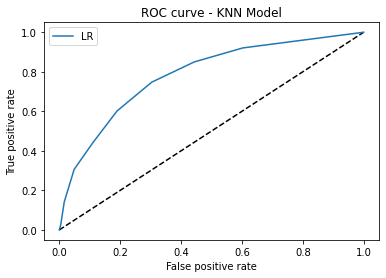

In [401]:
# ROC Curve
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_knn, tpr_knn, label='LR')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve - KNN Model')
plt.legend(loc='best')
plt.show()

In [402]:
metrics.auc(fpr_knn, tpr_knn)

0.7836910782438792

## Part 4: Extra Analysis - Feature Importance 

In [403]:
X_RF = X.copy()
X_RF.head()  

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.850000
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.500000
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.150002
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.750000
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.649994


In [404]:
# convert categorical features with >=3 levels

enc_ohe = OneHotEncoder()  # initiate a OneHotEncoder  

for idx in range(len(cate)):
  category = [cate[idx]]
  enc_ohe.fit(X_RF[category])
  X_RF = OneHotEncoding(X_RF, enc_ohe, category)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is d

In [405]:
X_RF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,Female,0,Yes,No,1,No,Yes,29.85,29.850000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Male,0,No,No,34,Yes,No,56.95,1889.500000,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,Male,0,No,No,2,Yes,Yes,53.85,108.150002,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Male,0,No,No,45,No,No,42.30,1840.750000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,Female,0,No,No,2,Yes,Yes,70.70,151.649994,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [406]:
# convert categorical features with 2 levels only

enc_oe = OrdinalEncoder()  

for idx in range(len(numerics)):
  category = [numerics[idx]]
  enc_oe.fit(X_RF[category]) 
  X_RF[category] = enc_oe.transform(X_RF[category]) 

In [407]:
X_RF.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,1,0.0,1.0,29.85,29.850000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,34,1.0,0.0,56.95,1889.500000,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,2,1.0,1.0,53.85,108.150002,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,45,0.0,0.0,42.30,1840.750000,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,2,1.0,1.0,70.70,151.649994,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [408]:
# check feature importance via random forest for feature selection

forest = RandomForestClassifier()
forest.fit(X_RF, y)  

importances = forest.feature_importances_   # feature_importances_  is an attribute of forest
indices = np.argsort(importances)[::-1]   # sort results as a descending order 

Indexs of descending ordered value =>  [ 8  7  4 33 38 15  0 24  6 13  2 35  1  3 18 21 11  9 34 37 12 17 36 39
 20 26 29 32 23 30 27 25  5 19 10 22 31 16 14 28]


In [409]:
# Print the feature ranking as descending order  
print("Feature importance ranking by Random Forest Model:") 
for ind in range(X.shape[1]):  
  print ("{0} : {1}".format(X_RF.columns[indices[ind]], round(importances[indices[ind]], 4))) 

Feature importance ranking by Random Forest Model:
TotalCharges : 0.1742
MonthlyCharges : 0.1525
tenure : 0.1504
Contract_Month-to-month : 0.0433
PaymentMethod_Electronic check : 0.0291
OnlineSecurity_No : 0.0279
gender : 0.0277
TechSupport_No : 0.0247
PaperlessBilling : 0.0247
InternetService_Fiber optic : 0.0234
Partner : 0.0228
Contract_Two year : 0.0227
SeniorCitizen : 0.0209
Dependents : 0.019
OnlineBackup_No : 0.0187
DeviceProtection_No : 0.0158
MultipleLines_Yes : 0.0133
MultipleLines_No : 0.0133
Contract_One year : 0.013
